In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iteration_path = "iteration_3/"
deliveries_path = "../data/" + iteration_path + "raw/deliveries.jsonl"
products_path = "../data/" + iteration_path + "raw/products.jsonl"
sessions_path = "../data/" + iteration_path + "raw/sessions.jsonl"
users_path = "../data/" + iteration_path + "raw/users.jsonl"

In [3]:
deliveries_data = pd.read_json(deliveries_path, lines=True)
products_data = pd.read_json(products_path, lines=True)
sessions_data = pd.read_json(sessions_path, lines=True)
users_data = pd.read_json(users_path, lines=True)

In [4]:
deliveries_data

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,20001,2021-05-19T07:02:36,2021-05-21T07:04:43,360
1,20002,2021-02-27T20:13:02,2021-03-02T20:15:54,516
2,20003,2021-04-25T13:44:28,2021-04-29T13:45:25,620
3,20004,2021-09-12T10:03:56,2021-09-14T10:07:12,516
4,20005,2021-07-10T16:12:54,2021-07-15T16:16:25,516
...,...,...,...,...
3608,23609,2021-11-05T01:26:21,2021-11-07T01:31:12,620
3609,23610,2021-07-05T18:23:31,2021-07-07T18:27:35,516
3610,23611,2021-07-20T17:15:10,2021-07-23T17:17:26,516
3611,23612,2021-11-06T05:53:32,2021-11-10T05:54:08,620


In [5]:
products_data

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,2048.50
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7639.00
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
...,...,...,...,...
314,1315,Jabra Talk,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,54.99
315,1316,Plantronics Voyager Legend,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,249.00
316,1317,Plantronics Savi W740,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,1303.96
317,1318,Plantronics Savi W710,Sprzęt RTV;Audio;Słuchawki,553.00


In [6]:
sessions_data

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,124,2021-05-19 06:57:15,102,1277,VIEW_PRODUCT,5,NaN
1,124,2021-05-19 06:59:15,102,1276,VIEW_PRODUCT,5,NaN
2,124,2021-05-19 07:02:36,102,1276,BUY_PRODUCT,5,20001.0
3,125,2021-04-23 13:46:03,102,1284,VIEW_PRODUCT,20,NaN
4,125,2021-04-23 13:50:10,102,1292,VIEW_PRODUCT,20,NaN
...,...,...,...,...,...,...,...
24569,6881,2021-11-03 05:28:10,301,1073,VIEW_PRODUCT,5,NaN
24570,6881,2021-11-03 05:33:08,301,1201,VIEW_PRODUCT,5,NaN
24571,6881,2021-11-03 05:36:58,301,1072,VIEW_PRODUCT,5,NaN
24572,6881,2021-11-03 05:37:32,301,1222,VIEW_PRODUCT,5,NaN


In [7]:
users_data

,user_id,name,city,street
0,102,Arkadiusz Hejna,Wrocław,ul. Jana 32
1,103,Oskar Skotarczak,Warszawa,pl. Wrzosowa 595
2,104,Maksymilian Fik,Gdynia,al. Podwale 62
3,105,Fryderyk Hajdukiewicz,Gdynia,al. Narcyzowa 81/19
4,106,Marcelina Kinder,Wrocław,pl. Irysowa 472
...,...,...,...,...
195,297,Olga Myrcha,Kraków,plac Listopada 83/33
196,298,Nikodem Świgoń,Warszawa,ul. Złota 61/12
197,299,Gaja Wojtarowicz,Gdynia,ul. Baczynskiego 97
198,300,Inga Przewoźny,Radom,ulica Wysoka 33


In [8]:
sessions_data = sessions_data.sort_values(by=['timestamp'])
# sessions_data['timestamp_date'] = sessions_data['timestamp'].apply(lambda x: x.date())
sessions_data['timestamp_week'] = sessions_data['timestamp'].apply(lambda x: x.week)
sessions_data['timestamp_month'] = sessions_data['timestamp'].apply(lambda x: x.month)
sessions_data['timestamp_quarter'] = sessions_data['timestamp'].apply(lambda x: x.quarter)

Podział na zbiór testowy i treningowy

In [9]:
train_data = sessions_data[sessions_data.timestamp_month < 12]
test_data = sessions_data[sessions_data.timestamp_month >= 12]

In [10]:
# extracted_session_batch_one_month = extract_session_batch(sample_month_data)

In [11]:
# extracted_session_batch[extracted_session_batch.bought_product == True]

In [12]:
# extracted_session_batch_train = extract_session_batch(train_data)

In [13]:
# extracted_session_batch_one_year = extract_session_batch(sessions_data)

In [14]:
# extracted_session_batch_train

In [15]:
enriched_sessions_data = pd.merge(sessions_data, products_data, on="product_id").sort_values(by=['timestamp'])
enriched_sessions_data

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,timestamp_week,timestamp_month,timestamp_quarter,product_name,category_path,price
0,1615,2021-01-08 17:29:37,139,1032,VIEW_PRODUCT,10,NaN,1,1,1,LCD Iiyama E2280WSD,Komputery;Monitory;Monitory LCD,688.78
276,1615,2021-01-08 17:32:51,139,1033,VIEW_PRODUCT,10,NaN,1,1,1,LCD Iiyama T1932MSC,Komputery;Monitory;Monitory LCD,3029.00
277,1615,2021-01-08 17:35:32,139,1033,BUY_PRODUCT,10,20833.0,1,1,1,LCD Iiyama T1932MSC,Komputery;Monitory;Monitory LCD,3029.00
554,1635,2021-01-10 05:56:20,139,1292,VIEW_PRODUCT,20,NaN,1,1,1,Philips SDV8622,Sprzęt RTV;Video;Telewizory i akcesoria;Anteny...,189.00
813,1635,2021-01-10 05:57:54,139,1291,VIEW_PRODUCT,20,NaN,1,1,1,Philips SDV6224,Sprzęt RTV;Video;Telewizory i akcesoria;Anteny...,168.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21380,3603,2021-12-10 11:21:21,200,1041,VIEW_PRODUCT,20,NaN,49,12,4,Crysis 3 (PS3),Gry i konsole;Gry na konsole;Gry PlayStation3,79.90
20194,3603,2021-12-10 11:23:13,200,1047,VIEW_PRODUCT,20,NaN,49,12,4,Pirates of the Caribbean At World&#39;s End (PS3),Gry i konsole;Gry na konsole;Gry PlayStation3,89.90
18487,3603,2021-12-10 11:26:10,200,1040,VIEW_PRODUCT,20,NaN,49,12,4,Crysis 2 (PS3),Gry i konsole;Gry na konsole;Gry PlayStation3,79.90
18488,3603,2021-12-10 11:26:46,200,1040,BUY_PRODUCT,20,21867.0,49,12,4,Crysis 2 (PS3),Gry i konsole;Gry na konsole;Gry PlayStation3,79.90


<AxesSubplot:xlabel='month'>

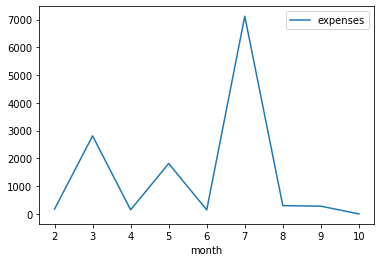

In [16]:
user_session_data = enriched_sessions_data[enriched_sessions_data['user_id'] == 105]
expenses=[]
for month in range (user_session_data['timestamp_month'].min(), user_session_data['timestamp_month'].max()):
    d = {
        "month": month,
        "expenses": user_session_data[(user_session_data['timestamp_month'] == month) & (user_session_data['event_type'] == "BUY_PRODUCT")]['price'].sum()}
    expenses.append(d)

df = pd.DataFrame(data=expenses)
df = df.set_index('month')
df.plot()
# calculate_correlation_quarter(user_session_data)

In [17]:
user_session_data[(user_session_data['timestamp_week'] == 30) & (user_session_data['event_type'] == "BUY_PRODUCT")]['price'].sum()

4598.0

# Ekstrakcja userów

In [18]:
def get_user_id_from_session(session):
    sample_user_id = session['user_id'].iloc[0]
    for user_id in session['user_id']:
        if sample_user_id != user_id:
            raise Exception("How it is even possible")
    return sample_user_id

In [19]:
def get_user_information(user_session_data):
    d = {
        'user_id': [get_user_id_from_session(user_session_data)],
        'expenses': [user_session_data[user_session_data['event_type'] == "BUY_PRODUCT"]['price'].sum()],
        'products_bought': [len(user_session_data[user_session_data['event_type'] == "BUY_PRODUCT"])],
        'events_number': [len(user_session_data)],
        'sessions_number': [len(user_session_data['session_id'].unique())],
        'average_discount': [user_session_data['offered_discount'].mean()],
        'average_discount_on_bought': [user_session_data[user_session_data['event_type'] == "BUY_PRODUCT"]['offered_discount'].mean()]
    }
    df = pd.DataFrame(data=d)
    return df.set_index('user_id')

In [20]:
def extract_users_data(sessions_data, users_data, products_data):
    enriched_sessions_data = pd.merge(sessions_data, products_data, on="product_id").sort_values(by=['timestamp'])
    extracted_users = []
    for user_id in enriched_sessions_data['user_id'].unique():
        extracted_users.append(get_user_information(enriched_sessions_data[enriched_sessions_data['user_id'] == user_id]))
    enriched_users_data = pd.concat(extracted_users)
    return pd.merge(enriched_users_data, users_data, on="user_id").drop(columns=['name', 'street'])
    # print(len(sessions_data.user_id.unique()))

### Agregacja sieci użytkownika

In [21]:
enriched_sessions_data = pd.merge(sessions_data, products_data, on="product_id").sort_values(by=['timestamp'])
user_session_data = enriched_sessions_data[enriched_sessions_data['user_id'] == 137]
user_session_data

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,timestamp_week,timestamp_month,timestamp_quarter,product_name,category_path,price
16718,1535,2021-06-24 20:30:32,137,1048,VIEW_PRODUCT,15,NaN,25,6,2,Gra o tron (PC),Gry i konsole;Gry komputerowe,63.49
3600,1535,2021-06-24 20:32:27,137,1050,VIEW_PRODUCT,15,NaN,25,6,2,Bioshock 2 (PC),Gry i konsole;Gry komputerowe,37.90
5232,1535,2021-06-24 20:37:12,137,1054,VIEW_PRODUCT,15,NaN,25,6,2,Call of Duty 2 (PC),Gry i konsole;Gry komputerowe,32.99
16991,1535,2021-06-24 20:41:01,137,1056,VIEW_PRODUCT,15,NaN,25,6,2,Call of Duty Black Ops (PC),Gry i konsole;Gry komputerowe,29.99
4429,1535,2021-06-24 20:41:12,137,1053,VIEW_PRODUCT,15,NaN,25,6,2,Anno 2070 (PC),Gry i konsole;Gry komputerowe,42.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,1547,2021-12-07 04:38:35,137,1051,VIEW_PRODUCT,0,NaN,49,12,4,Spec Ops The Line (PC),Gry i konsole;Gry komputerowe,76.90
4061,1547,2021-12-07 04:43:20,137,1052,VIEW_PRODUCT,0,NaN,49,12,4,Duke Nukem Forever (PC),Gry i konsole;Gry komputerowe,78.90
4062,1547,2021-12-07 04:46:16,137,1052,BUY_PRODUCT,0,20785.0,49,12,4,Duke Nukem Forever (PC),Gry i konsole;Gry komputerowe,78.90
19441,1521,2021-12-07 09:16:56,137,1283,VIEW_PRODUCT,20,NaN,49,12,4,Okulary 3D PHILIPS PTA436/00,Sprzęt RTV;Video;Telewizory i akcesoria;Okular...,99.99


In [22]:
user_bought_products = user_session_data[user_session_data['event_type'] == "BUY_PRODUCT"]

In [23]:
user_session_data['offered_discount'].mean()

10.69832402234637

In [24]:
user_session_data[user_session_data['event_type'] == "BUY_PRODUCT"]['offered_discount'].mean()

12.285714285714286

In [25]:
extract_users_data(sessions_data, users_data, products_data)

,user_id,expenses,products_bought,events_number,sessions_number,average_discount,average_discount_on_bought,city
0,139,23400.85,49,256,67,11.054688,10.816327,Kraków
1,242,44677.14,60,331,88,11.178248,10.500000,Radom
2,108,16312.03,23,130,33,9.461538,9.347826,Radom
3,143,7273.05,16,86,27,11.220930,11.562500,Kraków
4,140,33412.55,44,318,86,10.110063,9.659091,Poznań
...,...,...,...,...,...,...,...,...
195,289,0.00,0,7,1,20.000000,NaN,Warszawa
196,225,109.00,1,5,2,10.000000,10.000000,Warszawa
197,152,0.00,0,5,2,2.000000,NaN,Poznań
198,162,78.96,2,6,2,13.333333,12.500000,Szczecin


In [26]:
extracted_train = extract_users_data(train_data, users_data, products_data).sort_values(['user_id'])

In [27]:
extracted_train

,user_id,expenses,products_bought,events_number,sessions_number,average_discount,average_discount_on_bought,city
37,102,5743.62,13,105,33,7.571429,8.461538,Wrocław
138,103,19009.38,26,163,41,9.907975,9.423077,Warszawa
43,104,25259.70,36,205,63,11.073171,9.583333,Gdynia
31,105,12843.26,18,115,32,8.652174,9.444444,Gdynia
163,106,12342.84,16,129,35,9.302326,8.750000,Wrocław
...,...,...,...,...,...,...,...,...
161,297,9589.30,17,97,27,9.536082,9.117647,Kraków
175,298,11714.33,20,137,35,9.854015,9.250000,Warszawa
123,299,11498.74,19,154,47,8.084416,8.947368,Gdynia
82,300,13844.80,11,76,25,11.973684,11.363636,Radom


In [28]:
pd.isna(extracted_train).sum()

user_id                       0
expenses                      0
products_bought               0
events_number                 0
sessions_number               0
average_discount              0
average_discount_on_bought    2
city                          0
dtype: int64

In [29]:
extracted_test = extract_users_data(test_data, users_data, products_data).sort_values(['user_id'])

In [30]:
extracted_test

,user_id,expenses,products_bought,events_number,sessions_number,average_discount,average_discount_on_bought,city
53,103,554.77,5,20,6,3.000000,6.0,Warszawa
35,104,2332.01,2,7,3,4.285714,7.5,Gdynia
114,106,0.00,0,5,1,20.000000,NaN,Wrocław
18,107,78.90,1,4,2,11.250000,10.0,Radom
106,108,0.00,0,1,1,15.000000,NaN,Radom
...,...,...,...,...,...,...,...,...
75,297,109.00,1,3,2,15.000000,20.0,Kraków
49,298,2399.00,1,6,3,2.500000,0.0,Warszawa
24,299,0.00,0,7,1,10.000000,NaN,Gdynia
141,300,0.00,0,1,1,5.000000,NaN,Radom


In [31]:
desired_output = extracted_test[['user_id', 'expenses']].set_index('user_id')
desired_output = desired_output.rename(columns = {'expenses':'future_expenses'})

In [32]:
evaluation_table = pd.merge(extracted_train, desired_output, on="user_id").sort_values(by=['user_id'])
evaluation_table

,user_id,expenses,products_bought,events_number,sessions_number,average_discount,average_discount_on_bought,city,future_expenses
0,103,19009.38,26,163,41,9.907975,9.423077,Warszawa,554.77
1,104,25259.70,36,205,63,11.073171,9.583333,Gdynia,2332.01
2,106,12342.84,16,129,35,9.302326,8.750000,Wrocław,0.00
3,107,968.67,8,86,20,9.534884,7.500000,Radom,78.90
4,108,16312.03,23,129,32,9.418605,9.347826,Radom,0.00
...,...,...,...,...,...,...,...,...,...
138,297,9589.30,17,97,27,9.536082,9.117647,Kraków,109.00
139,298,11714.33,20,137,35,9.854015,9.250000,Warszawa,2399.00
140,299,11498.74,19,154,47,8.084416,8.947368,Gdynia,0.00
141,300,13844.80,11,76,25,11.973684,11.363636,Radom,0.00


In [33]:
evaluation_table.corr()

,user_id,expenses,products_bought,events_number,sessions_number,average_discount,average_discount_on_bought,future_expenses
user_id,1.000000,-0.043663,-0.037609,-0.001055,0.004749,-0.042412,0.051748,-0.050811
expenses,-0.043663,1.000000,0.833759,0.832803,0.812824,-0.130787,-0.072308,0.102978
products_bought,-0.037609,0.833759,1.000000,0.940580,0.922586,-0.209873,-0.161073,0.120224
events_number,-0.001055,0.832803,0.940580,1.000000,0.980953,-0.241005,-0.177210,0.134177
sessions_number,0.004749,0.812824,0.922586,0.980953,1.000000,-0.244526,-0.179419,0.147908
average_discount,-0.042412,-0.130787,-0.209873,-0.241005,-0.244526,1.000000,0.639120,-0.014205
average_discount_on_bought,0.051748,-0.072308,-0.161073,-0.177210,-0.179419,0.639120,1.000000,-0.038746
future_expenses,-0.050811,0.102978,0.120224,0.134177,0.147908,-0.014205,-0.038746,1.000000


In [34]:
evaluation_table['future_expenses_binrz'] = evaluation_table['future_expenses'].apply(lambda b: 1 if b > 3000 else 0)

In [35]:
evaluation_table

,user_id,expenses,products_bought,events_number,sessions_number,average_discount,average_discount_on_bought,city,future_expenses,future_expenses_binrz
0,103,19009.38,26,163,41,9.907975,9.423077,Warszawa,554.77,0
1,104,25259.70,36,205,63,11.073171,9.583333,Gdynia,2332.01,0
2,106,12342.84,16,129,35,9.302326,8.750000,Wrocław,0.00,0
3,107,968.67,8,86,20,9.534884,7.500000,Radom,78.90,0
4,108,16312.03,23,129,32,9.418605,9.347826,Radom,0.00,0
...,...,...,...,...,...,...,...,...,...,...
138,297,9589.30,17,97,27,9.536082,9.117647,Kraków,109.00,0
139,298,11714.33,20,137,35,9.854015,9.250000,Warszawa,2399.00,0
140,299,11498.74,19,154,47,8.084416,8.947368,Gdynia,0.00,0
141,300,13844.80,11,76,25,11.973684,11.363636,Radom,0.00,0


In [36]:
evaluation_table.corr()

,user_id,expenses,products_bought,events_number,sessions_number,average_discount,average_discount_on_bought,future_expenses,future_expenses_binrz
user_id,1.000000,-0.043663,-0.037609,-0.001055,0.004749,-0.042412,0.051748,-0.050811,0.075166
expenses,-0.043663,1.000000,0.833759,0.832803,0.812824,-0.130787,-0.072308,0.102978,0.030967
products_bought,-0.037609,0.833759,1.000000,0.940580,0.922586,-0.209873,-0.161073,0.120224,0.047839
events_number,-0.001055,0.832803,0.940580,1.000000,0.980953,-0.241005,-0.177210,0.134177,0.066928
sessions_number,0.004749,0.812824,0.922586,0.980953,1.000000,-0.244526,-0.179419,0.147908,0.069786
average_discount,-0.042412,-0.130787,-0.209873,-0.241005,-0.244526,1.000000,0.639120,-0.014205,0.017213
average_discount_on_bought,0.051748,-0.072308,-0.161073,-0.177210,-0.179419,0.639120,1.000000,-0.038746,0.004241
future_expenses,-0.050811,0.102978,0.120224,0.134177,0.147908,-0.014205,-0.038746,1.000000,0.801112
future_expenses_binrz,0.075166,0.030967,0.047839,0.066928,0.069786,0.017213,0.004241,0.801112,1.000000


Przykłady użycia i resztki z developmentu

In [ ]:
get_user_information(user_session_data)

In [ ]:
extract_users_data(sessions_data, users_data, products_data)